In [3]:
import torch
import torch.nn as nn
import pandas as pd

from sklearn import preprocessing

#loading data
df = pd.read_csv("airquality.csv", nrows = 200)
df = df.drop(columns=['Date','Time','NMHC(GT)'])

#data noramlization
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df.astype(float))
df = pd.DataFrame(x_scaled)

x_data = df.to_numpy()
x_data = torch.Tensor(x_data).float()

#batch size
batch_size=1500

EPOCH = 700

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(12, 6),
            nn.Tanh(),
            nn.Linear(6, 2),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 6),
            nn.Tanh(),
            nn.Linear(6, 12),
            nn.ReLU(), # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
autoencoder = AutoEncoder()
loss_fun = nn.MSELoss()
opt = torch.optim.SGD(autoencoder.parameters(),lr=0.01)

In [3]:
#training
for epoch in range(EPOCH):
    encoded, decoded = autoencoder(x_data)
    
    loss = loss_fun(decoded,x_data)
    opt.zero_grad()
    
    loss.backward()
    opt.step()     
    

    if epoch in range(EPOCH):
        print('number of epoch', epoch, 'loss', loss.data)

number of epoch 0 loss tensor(0.2233)
number of epoch 1 loss tensor(0.2227)
number of epoch 2 loss tensor(0.2222)
number of epoch 3 loss tensor(0.2216)
number of epoch 4 loss tensor(0.2211)
number of epoch 5 loss tensor(0.2205)
number of epoch 6 loss tensor(0.2200)
number of epoch 7 loss tensor(0.2195)
number of epoch 8 loss tensor(0.2189)
number of epoch 9 loss tensor(0.2184)
number of epoch 10 loss tensor(0.2179)
number of epoch 11 loss tensor(0.2174)
number of epoch 12 loss tensor(0.2169)
number of epoch 13 loss tensor(0.2164)
number of epoch 14 loss tensor(0.2159)
number of epoch 15 loss tensor(0.2154)
number of epoch 16 loss tensor(0.2149)
number of epoch 17 loss tensor(0.2144)
number of epoch 18 loss tensor(0.2140)
number of epoch 19 loss tensor(0.2135)
number of epoch 20 loss tensor(0.2130)
number of epoch 21 loss tensor(0.2126)
number of epoch 22 loss tensor(0.2121)
number of epoch 23 loss tensor(0.2117)
number of epoch 24 loss tensor(0.2112)
number of epoch 25 loss tensor(0.21

number of epoch 240 loss tensor(0.1672)
number of epoch 241 loss tensor(0.1671)
number of epoch 242 loss tensor(0.1670)
number of epoch 243 loss tensor(0.1669)
number of epoch 244 loss tensor(0.1669)
number of epoch 245 loss tensor(0.1668)
number of epoch 246 loss tensor(0.1667)
number of epoch 247 loss tensor(0.1667)
number of epoch 248 loss tensor(0.1666)
number of epoch 249 loss tensor(0.1665)
number of epoch 250 loss tensor(0.1664)
number of epoch 251 loss tensor(0.1664)
number of epoch 252 loss tensor(0.1663)
number of epoch 253 loss tensor(0.1662)
number of epoch 254 loss tensor(0.1662)
number of epoch 255 loss tensor(0.1661)
number of epoch 256 loss tensor(0.1660)
number of epoch 257 loss tensor(0.1660)
number of epoch 258 loss tensor(0.1659)
number of epoch 259 loss tensor(0.1658)
number of epoch 260 loss tensor(0.1658)
number of epoch 261 loss tensor(0.1657)
number of epoch 262 loss tensor(0.1657)
number of epoch 263 loss tensor(0.1656)
number of epoch 264 loss tensor(0.1655)


number of epoch 496 loss tensor(0.1588)
number of epoch 497 loss tensor(0.1588)
number of epoch 498 loss tensor(0.1588)
number of epoch 499 loss tensor(0.1588)
number of epoch 500 loss tensor(0.1588)
number of epoch 501 loss tensor(0.1588)
number of epoch 502 loss tensor(0.1588)
number of epoch 503 loss tensor(0.1587)
number of epoch 504 loss tensor(0.1587)
number of epoch 505 loss tensor(0.1587)
number of epoch 506 loss tensor(0.1587)
number of epoch 507 loss tensor(0.1587)
number of epoch 508 loss tensor(0.1587)
number of epoch 509 loss tensor(0.1587)
number of epoch 510 loss tensor(0.1587)
number of epoch 511 loss tensor(0.1587)
number of epoch 512 loss tensor(0.1587)
number of epoch 513 loss tensor(0.1586)
number of epoch 514 loss tensor(0.1586)
number of epoch 515 loss tensor(0.1586)
number of epoch 516 loss tensor(0.1586)
number of epoch 517 loss tensor(0.1586)
number of epoch 518 loss tensor(0.1586)
number of epoch 519 loss tensor(0.1586)
number of epoch 520 loss tensor(0.1586)


Text(0.5, 1.0, 'Latent space')

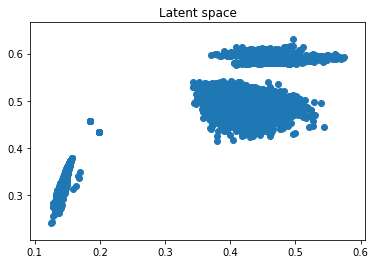

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

data_array = encoded.detach().numpy()

plt.scatter(data_array[:,0],data_array[:,1])
plt.title("Latent space")

In [5]:
print(encoded.detach().numpy())

[[0.33600873 0.29912153]
 [0.33290225 0.30417842]
 [0.32529885 0.31995854]
 [0.32485482 0.32072598]
 [0.32627222 0.3192973 ]
 [0.32085174 0.3217566 ]
 [0.31275767 0.32575879]
 [0.31118605 0.32646775]
 [0.302972   0.3273351 ]
 [0.20955992 0.3642238 ]
 [0.10005118 0.30741996]
 [0.28017205 0.32735533]
 [0.2929356  0.32393357]
 [0.3069541  0.32069308]
 [0.3224649  0.3127916 ]
 [0.319755   0.32750294]
 [0.3245016  0.3204335 ]
 [0.32190907 0.32026303]
 [0.31587362 0.34292468]
 [0.31519595 0.35279912]
 [0.31691903 0.35067588]
 [0.31904203 0.35256228]
 [0.32985798 0.3377975 ]
 [0.32554555 0.32731217]
 [0.31496727 0.31938195]
 [0.29637003 0.31837562]
 [0.3070456  0.31177002]
 [0.32509965 0.30260235]
 [0.31491292 0.2977848 ]
 [0.29673517 0.30301118]
 [0.31565624 0.29512137]
 [0.31916082 0.2890228 ]
 [0.30548707 0.2976804 ]
 [0.19504088 0.34117657]
 [0.07568535 0.28408733]
 [0.26538402 0.30403376]
 [0.28419036 0.30335647]
 [0.29718646 0.30851325]
 [0.29241613 0.3062144 ]
 [0.         0.3455044 ]


In [6]:
decoded.shape

torch.Size([200, 12])

In [5]:
print(decoded)

tensor([[0.0000, 0.4114, 0.2755,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4012, 0.2822,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4062, 0.2789,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.4012, 0.2822,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4050, 0.2797,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4012, 0.2822,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ThresholdBackward0>)
